# Genrating Images
In this notebook, we will use a trained GAN to generate an experimental image from simulated data.

In [5]:
import tensorflow as tf
from models import unet_generator
from generate_image import generate_image, GAN_image_folder

In [7]:
parent_dir = "D:/stem-learning/"

fine_size, stride = 256, 256
num_channels=1

identifier_list =  ["checkpoint_20220520_unet_gen_fft_10_reparamed_dist_Gr_1",
                    "checkpoint_20220520_unet_gen_fft_10_reparamed_dist_Gr_2",
                    "checkpoint_20220520_unet_gen_fft_10_reparamed_dist_Gr_3",
                    "checkpoint_20220520_unet_gen_fft_10_reparamed_dist_STO_1",
                    "checkpoint_20220520_unet_gen_fft_10_reparamed_dist_STO_2",
                    "checkpoint_20220520_unet_gen_fft_10_reparamed_dist_STO_3",
                    ]

processing data
loading model
stride: 256
predicting data
stitching data


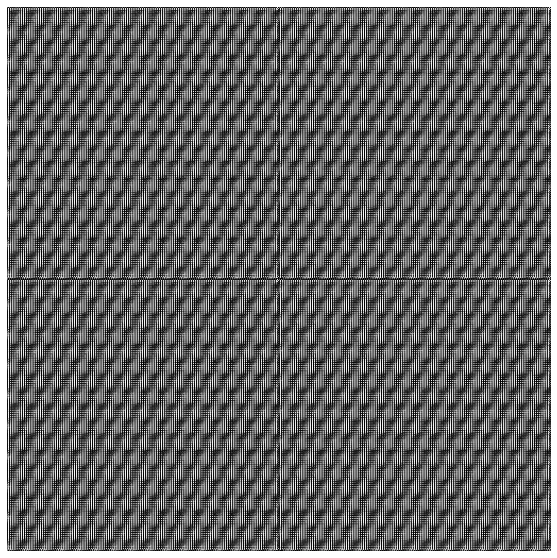

saving data
processing data
loading model
stride: 256
predicting data
stitching data


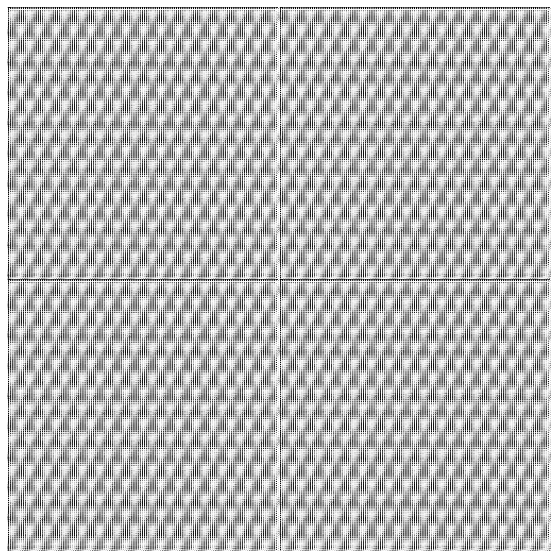

saving data
processing data
loading model
stride: 256
predicting data
stitching data


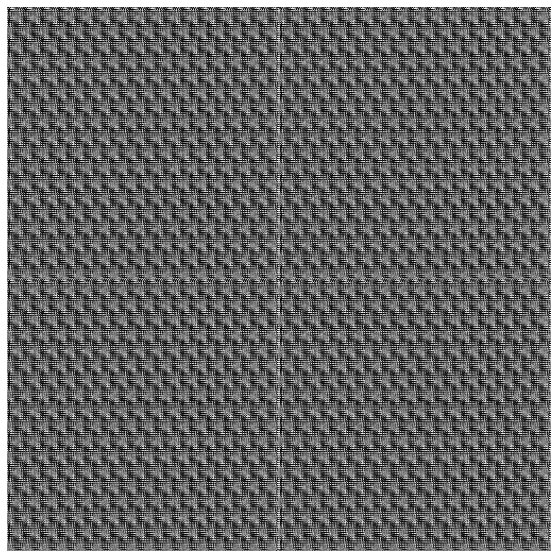

saving data
processing data
loading model
stride: 256
predicting data
stitching data


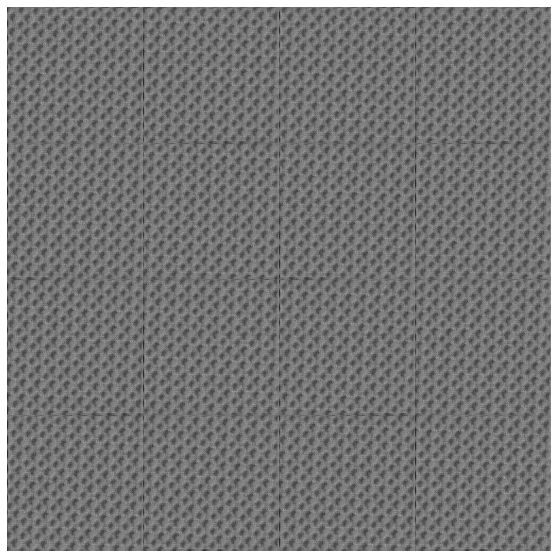

saving data
processing data
loading model
stride: 256
predicting data
stitching data


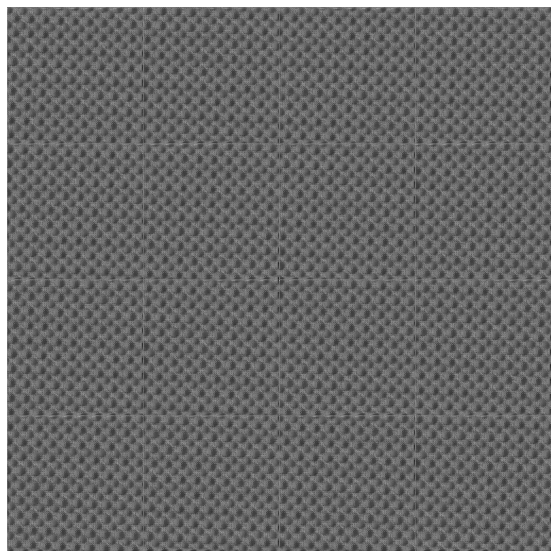

saving data
processing data
loading model
stride: 256
predicting data
stitching data


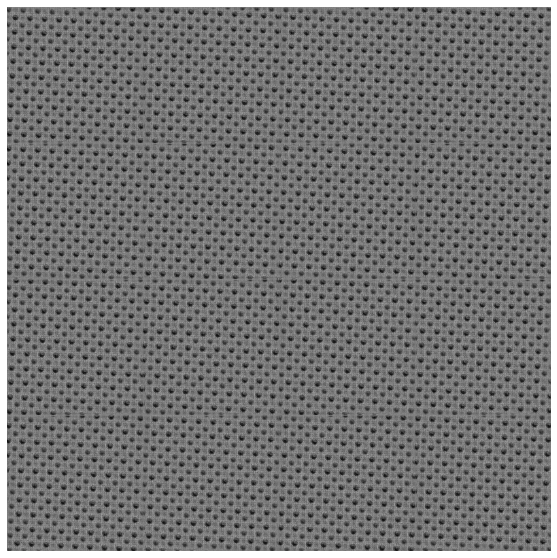

saving data


In [9]:
for material in ['Gr', 'STO']:
    for num in ["1", "2", "3"]:
        identifier = "checkpoint_20220520_unet_gen_fft_10_reparamed_dist_{}_{}".format(material, num)
        generator_exp = unet_generator(num_channels, 1, "instancenorm")

        checkpoint_path = parent_dir + "cycle_gan_results/checkpoints/checkpoint_{}".format(identifier)

        ckpt = tf.train.Checkpoint(generator_exp=generator_exp)
        ckpt_manager = tf.train.CheckpointManager(ckpt, checkpoint_path, max_to_keep=3)
        # if a checkpoint exists, restore the latest checkpoint.
        if ckpt_manager.latest_checkpoint:
            #cpath = ckpt_manager.checkpoints[-2]
            cpath = ckpt_manager.latest_checkpoint
            print("loading checkpoint ", cpath)
            ckpt.restore(cpath)
            print ('Latest checkpoint restored!')

        model = generator_exp
        input_folder = "{}data/{}/{}_{}/".format(parent_dir, material, material, num)
        sim_folder   = "{}/sim_1K/".format(input_folder)
        input_file = "{}{}".format(sim_folder, os.listdir(sim_folder)[0])
        fine_size = 256
        stride= 256
        avg=False
        plot=True
        save_data=True
        save_dir= input_folder
        fname='generated_{}_{}.tiff'.format(material, num)

        img = generate_image(model, input_file, fine_size, stride, avg, plot, save_data, save_dir,fname)

In [2]:
import os

If we want to make batch images:

In [8]:
os.listdir(parent_dir)[0]

'.git'